In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
train_data.shape

(31647, 18)

In [6]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [7]:
test_data.shape

(13564, 17)

In [8]:
# Removing duplicates:
train_data=train_data.drop_duplicates(keep='first')
train_data.shape

(31647, 18)

In [9]:
# Removing duplicates:
test_data=test_data.drop_duplicates(keep='first')
test_data.shape

(13564, 17)

In [10]:
train_data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [11]:
test_data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [12]:
train_data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.6+ MB


In [14]:
train_data = train_data.drop (columns = ['ID'])
test_data = test_data.drop (columns=['ID'])


In [15]:
train_data.nunique()

age             76
job             12
marital          3
education        4
default          2
balance       6326
housing          2
loan             2
contact          3
day             31
month           12
duration      1454
campaign        45
pdays          509
previous        38
poutcome         4
subscribed       2
dtype: int64

In [16]:
n_data = train_data[['age','balance','duration','pdays','previous']]
c_data = train_data[['job','marital','education','default','housing','loan','contact','month','day','poutcome','subscribed']]

In [17]:
# printing new unique values
column_names = c_data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(train_data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : job
------------------------------------------
blue-collar      21.619743
management       20.978292
technician       16.769362
admin.           11.473441
services          9.173065
retired           4.973615
self-employed     3.548520
entrepreneur      3.185136
unemployed        2.859671
housemaid         2.761715
student           2.006509
unknown           0.650931
Name: job, dtype: float64


Column Name        : marital
------------------------------------------
married     60.337473
single      28.192246
divorced    11.470282
Name: marital, dtype: float64


Column Name        : education
------------------------------------------
secondary    51.265523
tertiary     29.389832
primary      15.192593
unknown       4.152052
Name: education, dtype: float64


Column Name        : default
------------------------------------------
no     98.151484
yes     1.848516
Name: default, dtype: float64


Column Name        : housing
------------------------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

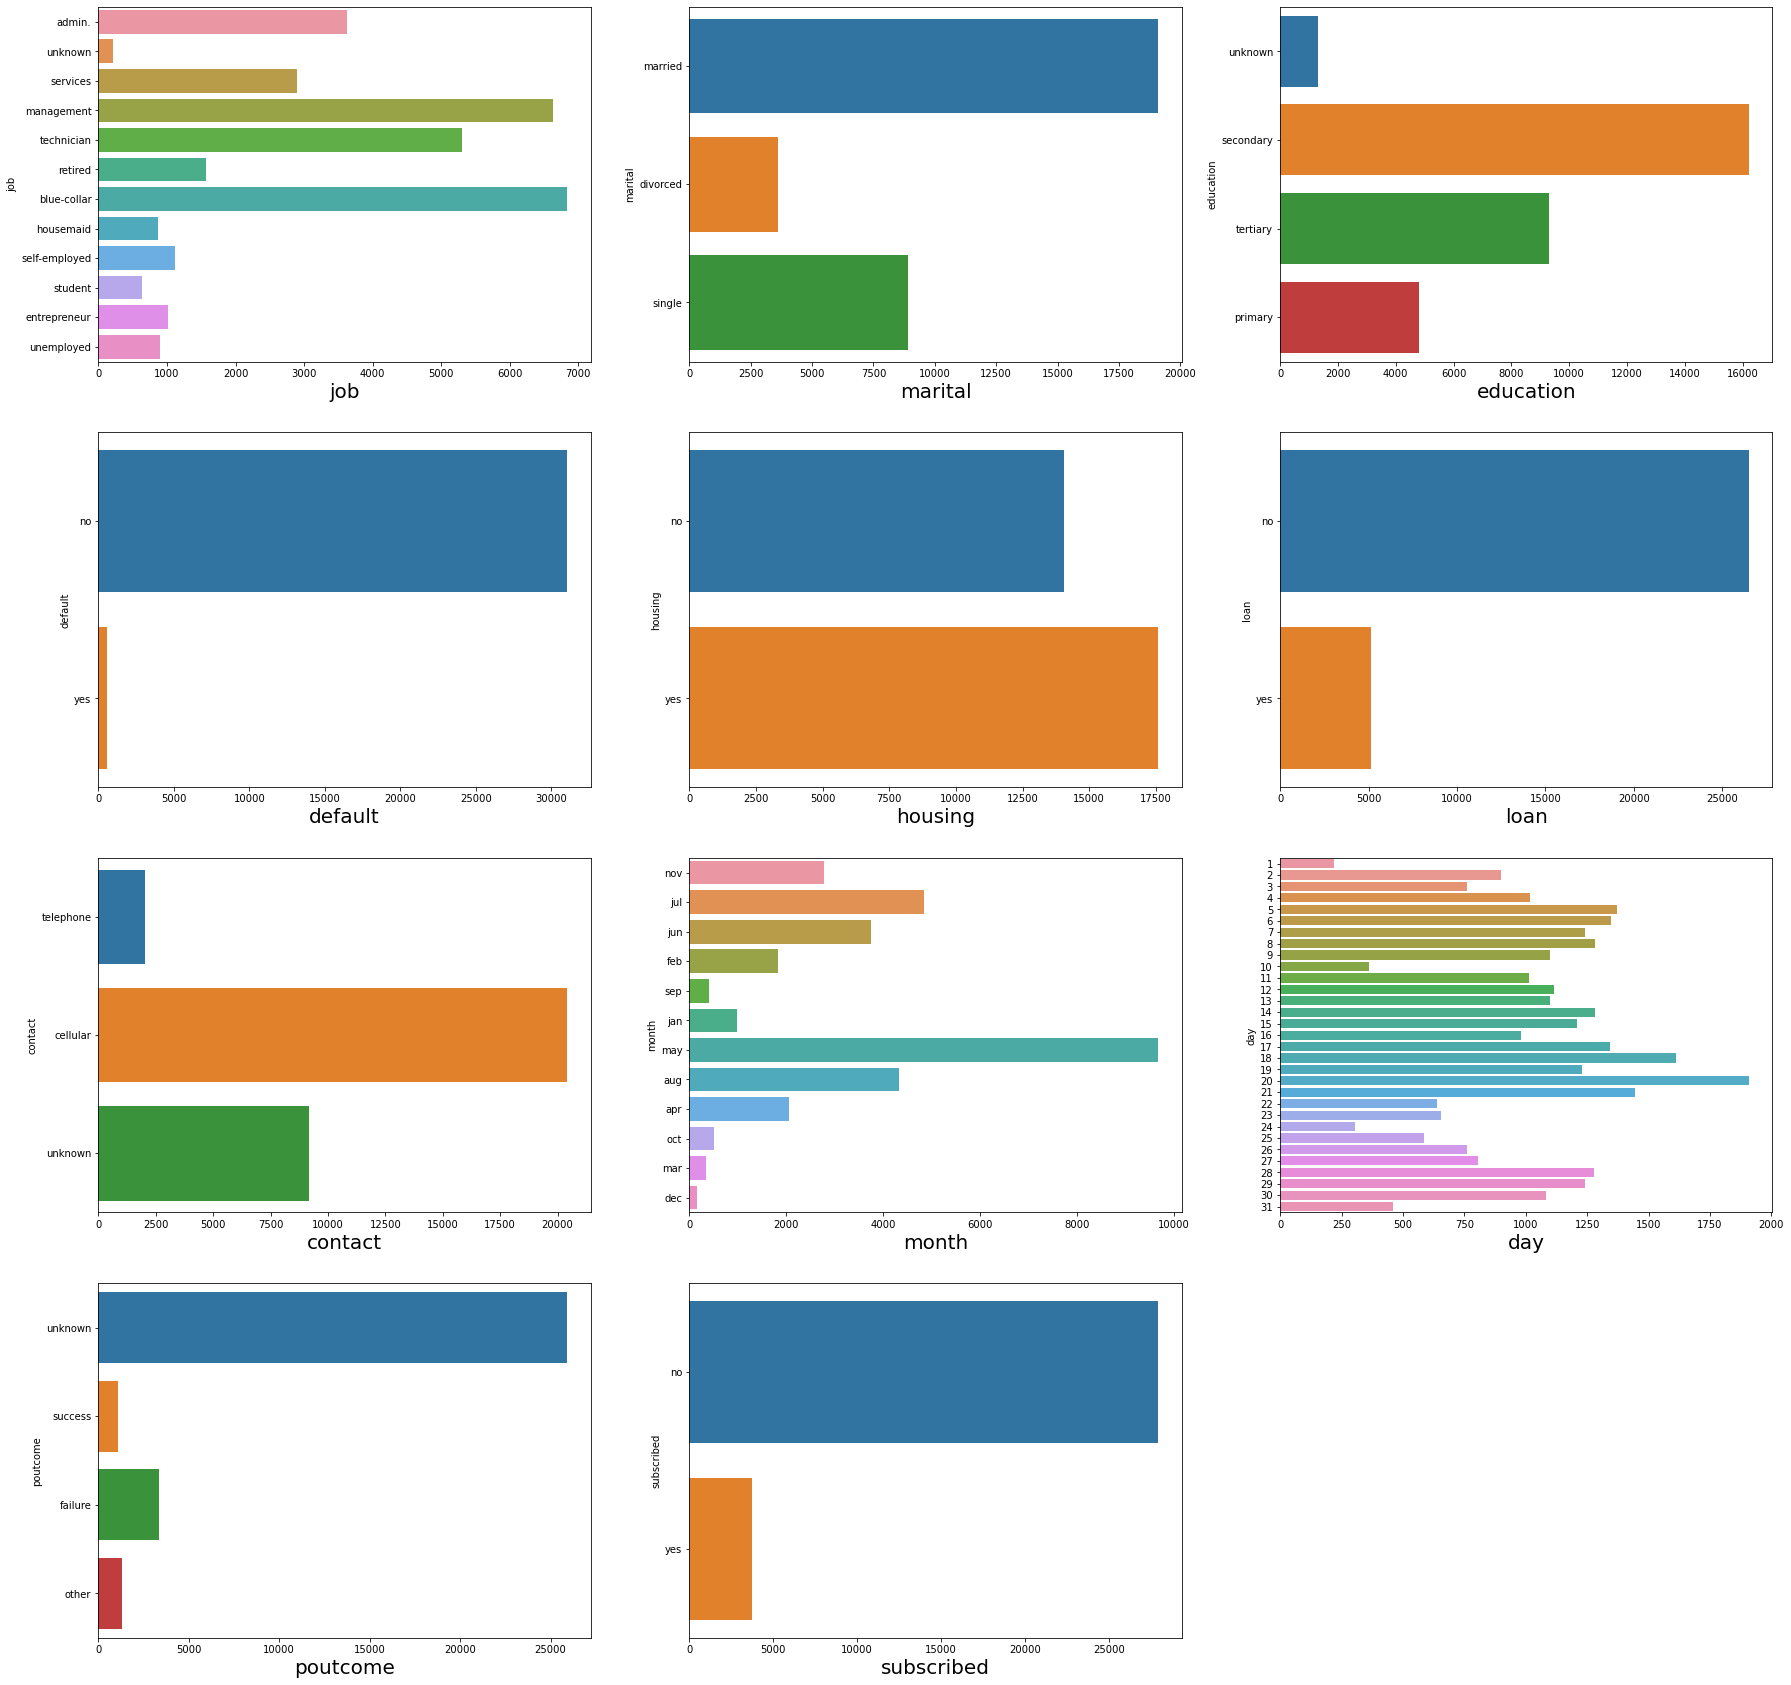

In [18]:
#Data Visualisation
#Univariate Analysis

plt.figure(figsize=(30,30))
plotnumber = 1
for column in c_data:
    if plotnumber <=11:
        ax= plt.subplot(4,3,plotnumber)
        sns.countplot(y=c_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

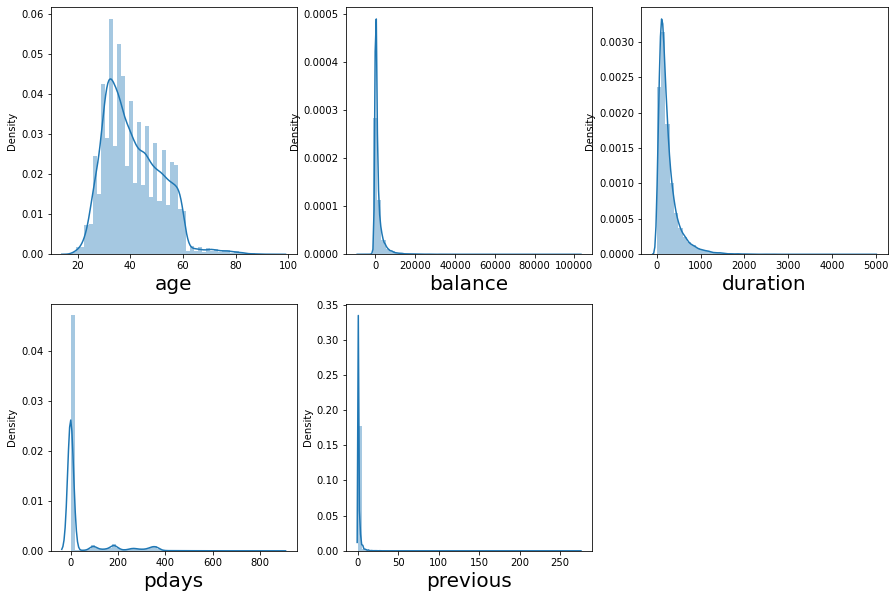

In [19]:
#Plotting graphs for numerical data
plt.figure(figsize=(15,10))
plotnumber = 1
for column in n_data:
    if plotnumber <=5:
        ax= plt.subplot(2,3,plotnumber)
        sns.distplot(n_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [20]:
#checking for skewness:
n_data.skew()

age          0.681607
balance      7.995696
duration     3.199766
pdays        2.642374
previous    49.302348
dtype: float64

In [21]:
# Encoding data
from sklearn.preprocessing import LabelEncoder
L_encoder = LabelEncoder()

In [22]:
for i in train_data.columns:
    if train_data[i].dtypes=='object':
        train_data[i]=L_encoder.fit_transform(train_data[i].values.reshape(-1,1))

In [23]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


In [24]:
for i in test_data.columns:
    if test_data[i].dtypes=='object':
        test_data[i]=L_encoder.fit_transform(test_data[i].values.reshape(-1,1))

In [25]:
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3


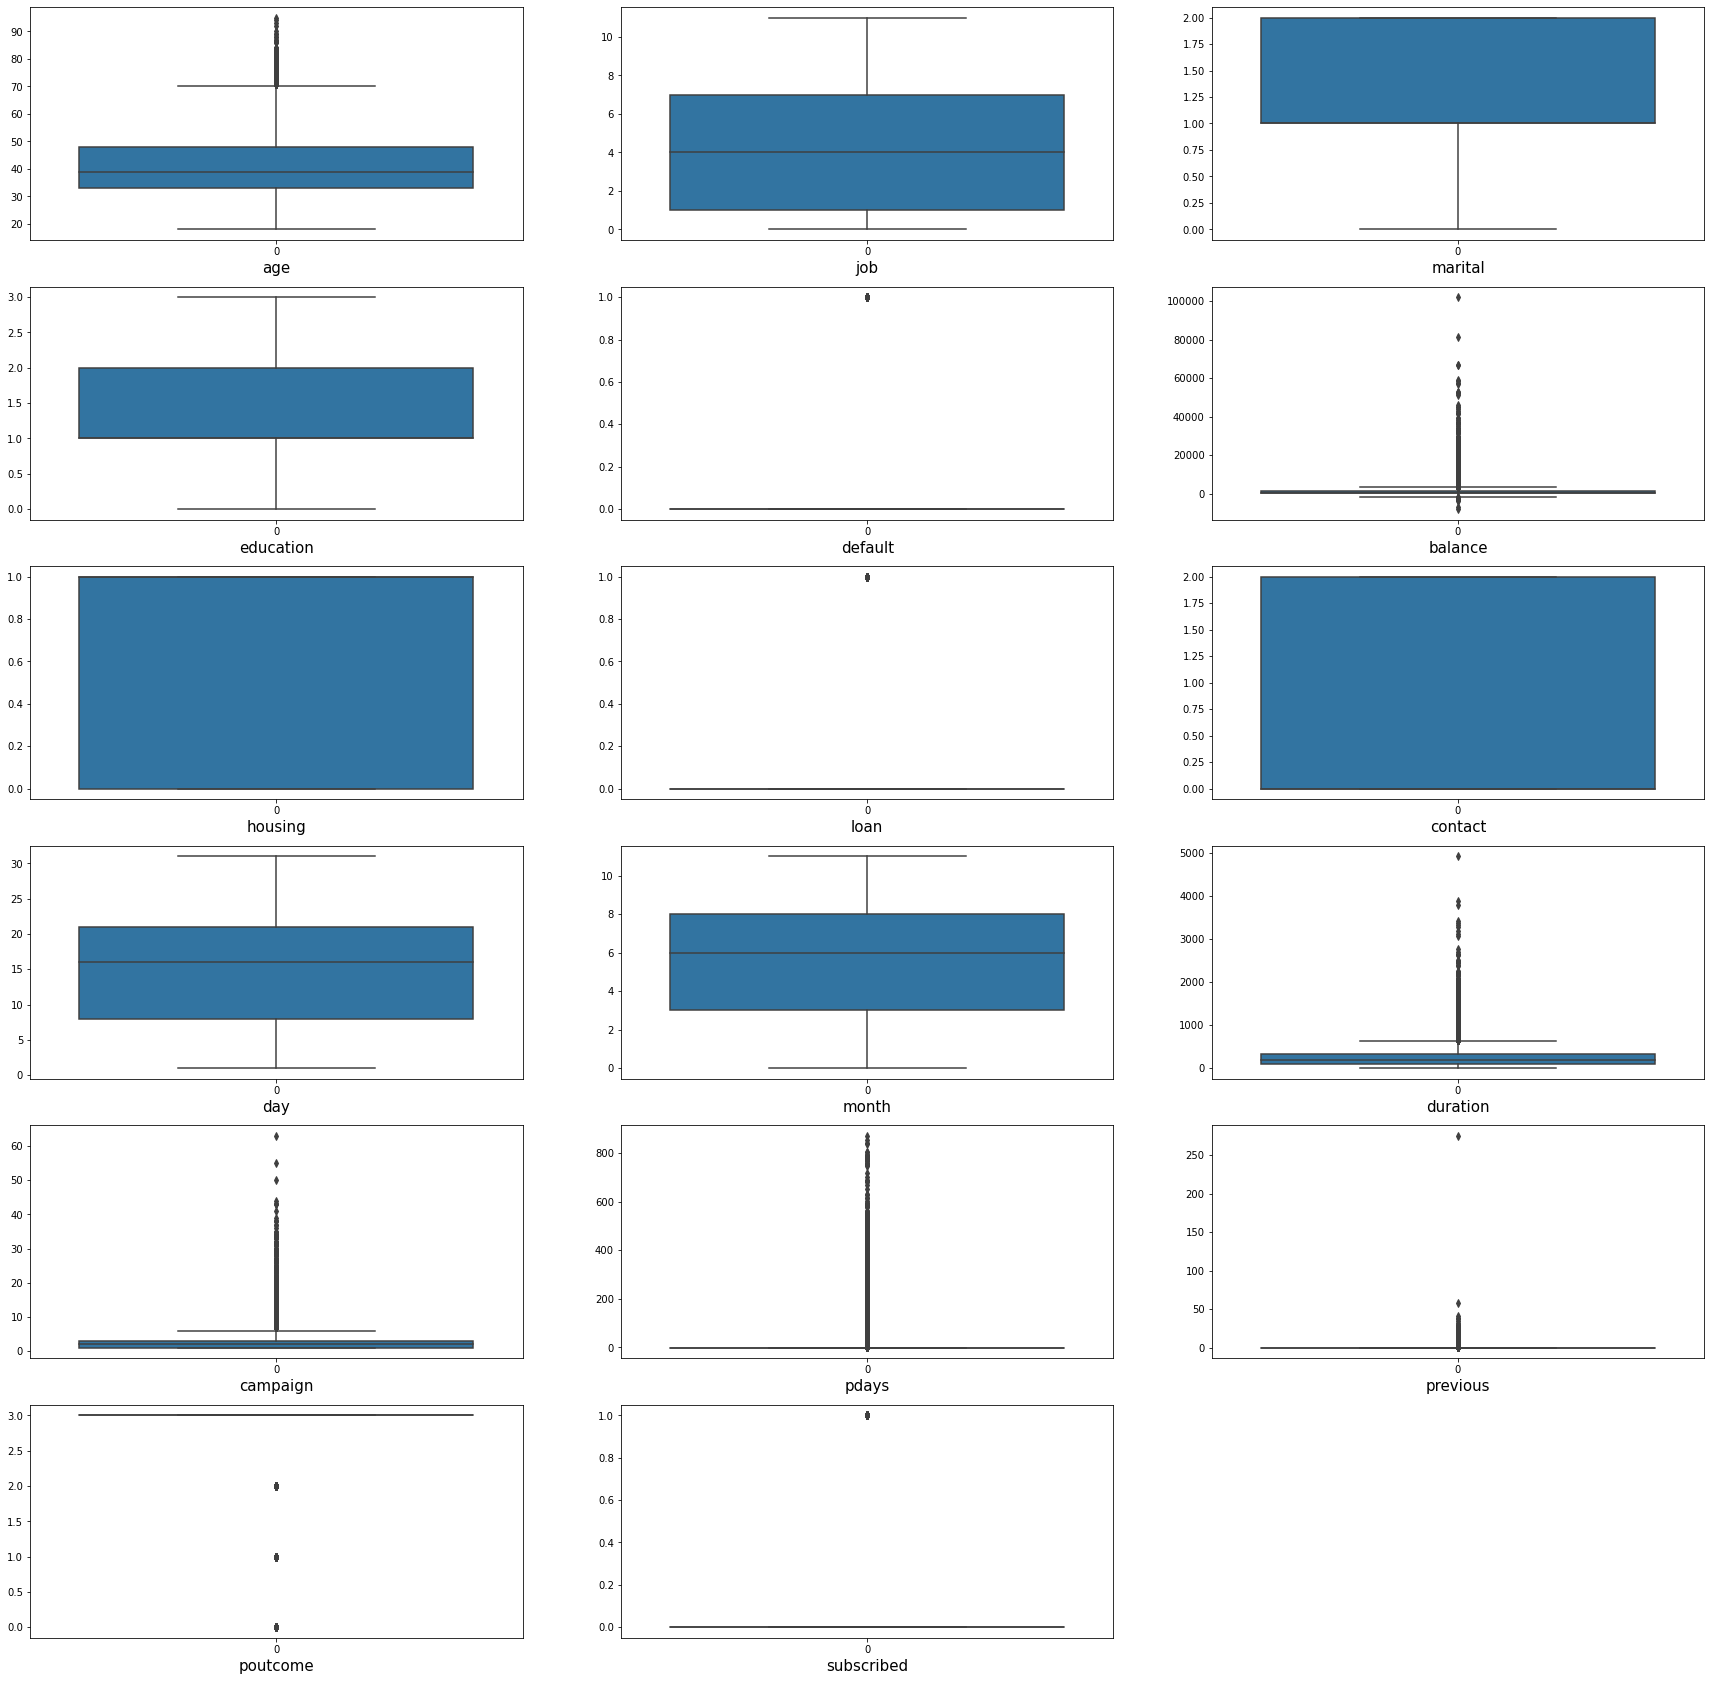

In [26]:
#checking for outliers:
plt.figure(figsize=(30,30))
graph =1
for column in train_data:
    if graph <=17:
        plt.subplot(6,3,graph)
        ax=sns.boxplot(data=train_data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [27]:
features=train_data.drop('subscribed',axis=1)
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers=pd.DataFrame (np.where(z>3))
outlier=outliers.transpose()

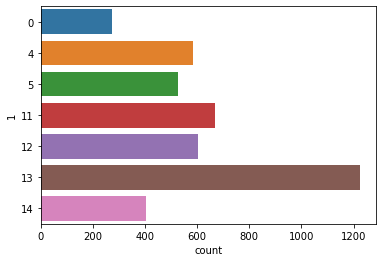

In [28]:
sns_plot = sns.countplot(y=1, data=outlier)
plt.show()

In [29]:
#Since column 'previous' is highly skewed and also has the most number of ouliers dropping previous from the datasets
train_data=train_data.drop(columns=['previous'])
test_data=test_data.drop(columns=['previous'])

In [30]:
#Again using z score to find outliers for  column:
features=train_data.drop('subscribed',axis=1)
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers=np.where(z>3)
outliers

(array([   10,    21,    26, ..., 31622, 31622, 31646], dtype=int64),
 array([ 4, 12,  5, ...,  0, 13, 11], dtype=int64))

In [31]:
data=train_data.drop(outliers[0])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,3,0
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,3,0


In [32]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,3,0
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,3,0


In [33]:
data_loss=((31644-27889)/31644)*100
data_loss

11.866388572873214

In [34]:
# checking for skewness:
data.skew()

age           0.442986
job           0.256699
marital      -0.097389
education     0.196401
default       0.000000
balance       2.424615
housing      -0.211081
loan          1.830877
contact       0.713128
day           0.077474
month        -0.466359
duration      1.594227
campaign      2.054932
pdays         2.682471
poutcome     -2.339116
subscribed    2.594932
dtype: float64

In [35]:
# Since we are loosing more than 10% of the data and still not able to reduce the skewness we will not deleted the outliers
# will use power transform to treat outliers

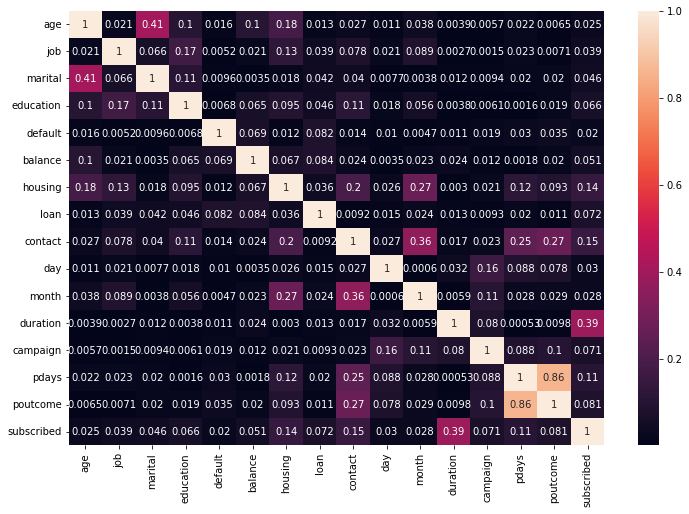

In [36]:
# Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = train_data.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

In [37]:
# pdays and poutcome seem to have multicollinearity
# Also most of the features dont seem to have very strong relationship with label

In [40]:
# Dividing data into feature and label
X= train_data.drop(columns=['subscribed'])
Y= train_data['subscribed']

<function matplotlib.pyplot.show(close=None, block=None)>

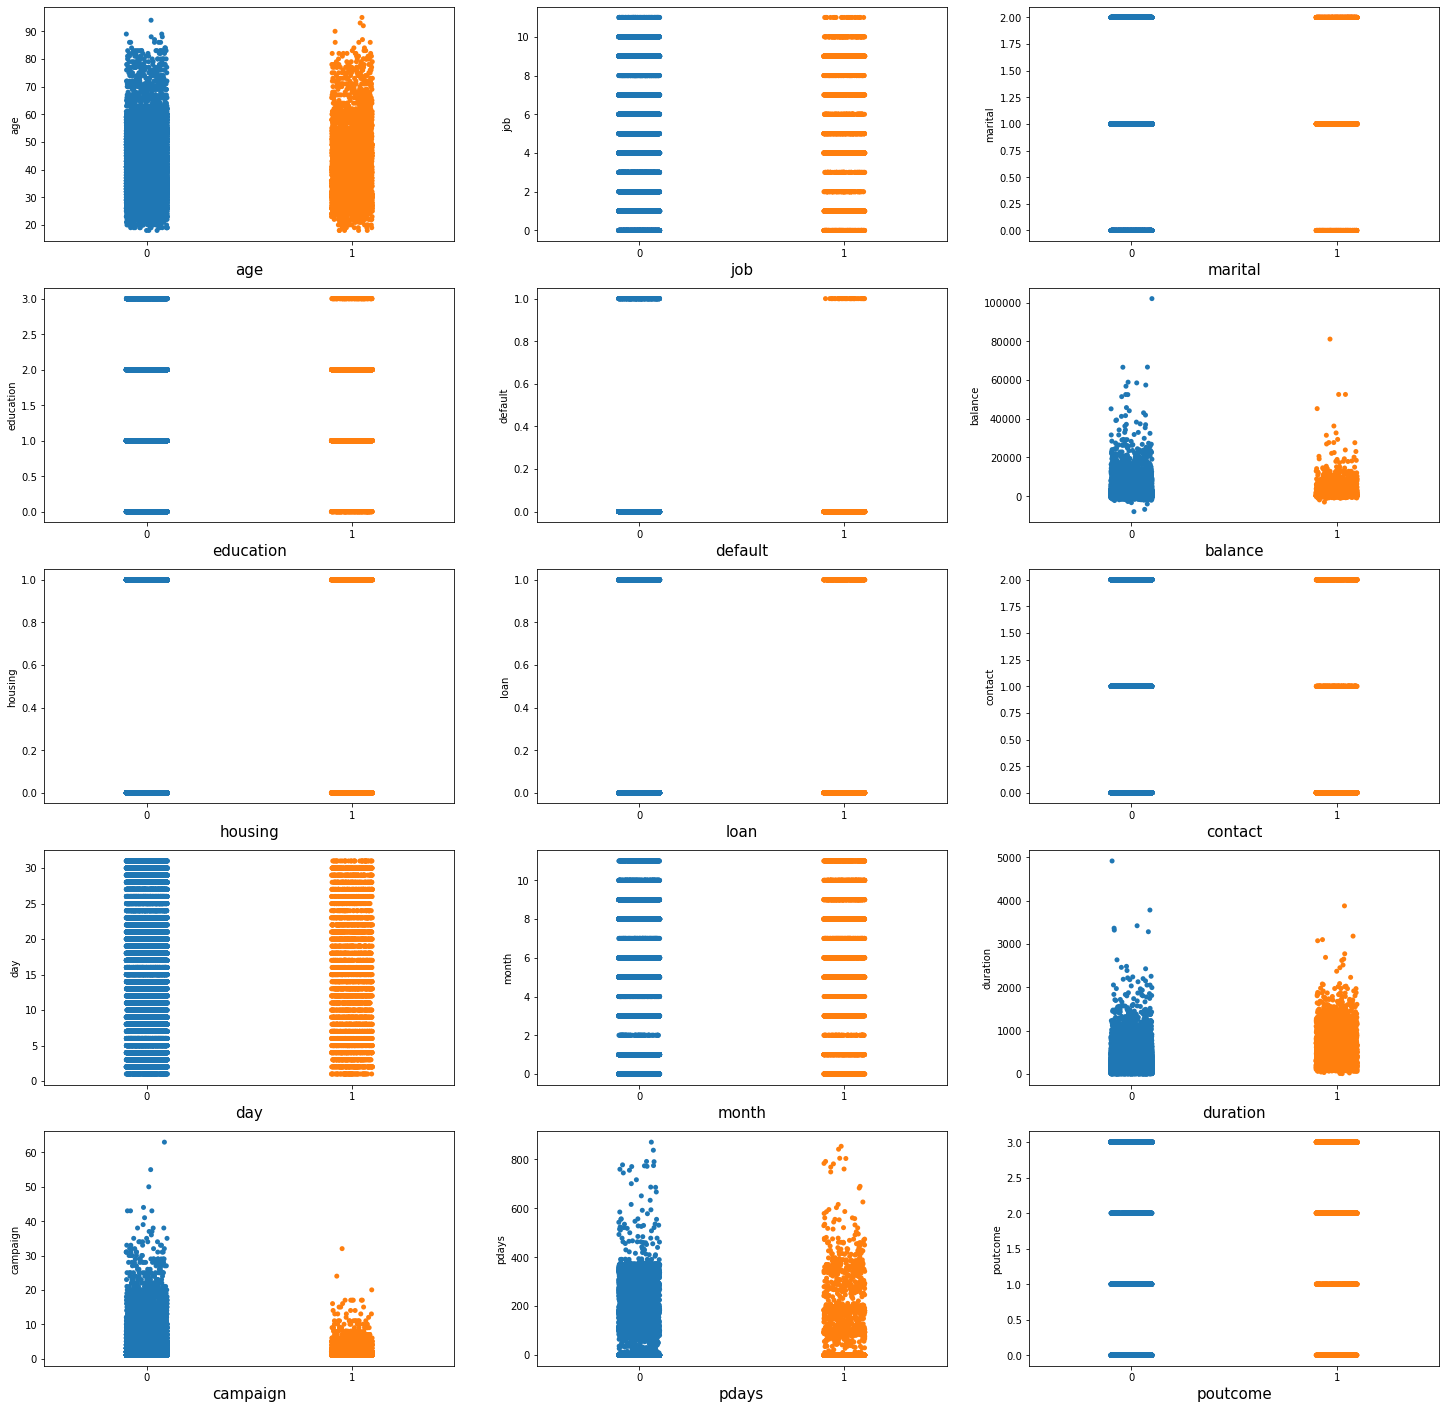

In [44]:
# Plotting relational graphs between features and label
plt.figure(figsize=(25,25))
plotnumber = 1
for column in X:
    if plotnumber <=15:
        ax= plt.subplot(5,3,plotnumber)
        sns.stripplot(Y,X[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show

In [48]:
#Applying Power Transformer
p_transformer = PowerTransformer()
X_scaled = pd.DataFrame(p_transformer.fit_transform(X), columns=X.columns)

In [49]:
#Checking for skewness
X_scaled.skew()

age          0.008940
job         -0.145894
marital     -0.050323
education   -0.039618
default      7.149903
balance      0.821075
housing     -0.223918
loan         1.833474
contact      0.627828
day         -0.159858
month       -0.383709
duration     0.017331
campaign     0.230683
pdays        1.660825
poutcome    -1.698601
dtype: float64

In [46]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,1.309067,age
1,1.065126,job
2,1.258222,marital
3,1.080540,education
4,1.031312,default
5,1.061968,balance
6,1.175753,housing
7,1.026963,loan
8,1.298656,contact
9,1.032986,day


In [50]:
# Droppin pdays as it is skewed and has a high vif
X_scaled=X_scaled.drop(columns=['pdays'])
test_data=test_data.drop(columns=['pdays'])

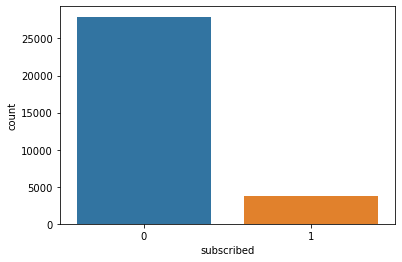

In [51]:
sns.countplot(Y)
plt.show()

In [52]:
print(Y.value_counts(normalize=True, dropna=False)*100)

0    88.261131
1    11.738869
Name: subscribed, dtype: float64


In [53]:
# The label is imbalanced
# Balancing the data using SMOTE
from imblearn.over_sampling import SMOTE

In [54]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = 285)

In [55]:
x_train_rs,y_train_rs= SMOTE().fit_resample(x_train,y_train)

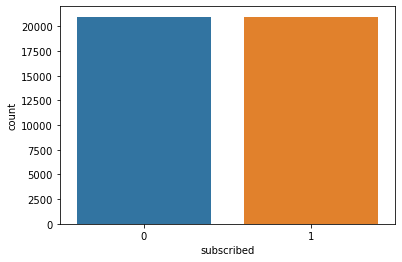

In [56]:
sns.countplot(y_train_rs)
plt.show()

In [57]:
# the target column of training data is balanced

In [59]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    print ("Acuraccy of training model :",accuracy_score(y_train,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Classification report of training data :",classification_report(y_train,pred_train))
    print ("Classification report of test data : ",classification_report(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))

In [60]:
#Logistic Regression
lg= LogisticRegression()
model_selection(lg,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.8910469770381293
Accuracy of testing model : 0.8858695652173914
Classification report of training data :               precision    recall  f1-score   support

           0       0.91      0.98      0.94     20983
           1       0.57      0.24      0.34      2752

    accuracy                           0.89     23735
   macro avg       0.74      0.61      0.64     23735
weighted avg       0.87      0.89      0.87     23735

Classification report of test data :                precision    recall  f1-score   support

           0       0.90      0.98      0.94      6949
           1       0.58      0.23      0.33       963

    accuracy                           0.89      7912
   macro avg       0.74      0.61      0.64      7912
weighted avg       0.86      0.89      0.86      7912

Confusion Matrix 
 [[6783  166]
 [ 737  226]]


In [61]:
#KNN
knn= KNeighborsClassifier()
model_selection(knn,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9180535074784074
Accuracy of testing model : 0.8868806875631952
Classification report of training data :               precision    recall  f1-score   support

           0       0.93      0.99      0.96     20983
           1       0.78      0.40      0.53      2752

    accuracy                           0.92     23735
   macro avg       0.86      0.69      0.74     23735
weighted avg       0.91      0.92      0.91     23735

Classification report of test data :                precision    recall  f1-score   support

           0       0.90      0.97      0.94      6949
           1       0.58      0.25      0.35       963

    accuracy                           0.89      7912
   macro avg       0.74      0.61      0.65      7912
weighted avg       0.86      0.89      0.87      7912

Confusion Matrix 
 [[6773  176]
 [ 719  244]]


In [62]:
#Decision Tree
dt = DecisionTreeClassifier()
model_selection(dt,x_train,y_train,x_test,y_test)

Acuraccy of training model : 1.0
Accuracy of testing model : 0.8670374115267947
Classification report of training data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20983
           1       1.00      1.00      1.00      2752

    accuracy                           1.00     23735
   macro avg       1.00      1.00      1.00     23735
weighted avg       1.00      1.00      1.00     23735

Classification report of test data :                precision    recall  f1-score   support

           0       0.93      0.92      0.92      6949
           1       0.45      0.46      0.46       963

    accuracy                           0.87      7912
   macro avg       0.69      0.69      0.69      7912
weighted avg       0.87      0.87      0.87      7912

Confusion Matrix 
 [[6414  535]
 [ 517  446]]


In [63]:
# Hyperparameter Tuning :

parameters = {'criterion':['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(5,8),
    'min_samples_split':range(5,10)
    }

clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 7}


In [64]:
dt1 = DecisionTreeClassifier(criterion= 'gini', max_depth = 10, min_samples_leaf = 7, min_samples_split = 7)
model_selection(dt1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9251737939751422
Accuracy of testing model : 0.890798786653185
Classification report of training data :               precision    recall  f1-score   support

           0       0.94      0.97      0.96     20983
           1       0.73      0.56      0.63      2752

    accuracy                           0.93     23735
   macro avg       0.84      0.77      0.80     23735
weighted avg       0.92      0.93      0.92     23735

Classification report of test data :                precision    recall  f1-score   support

           0       0.92      0.95      0.94      6949
           1       0.57      0.44      0.50       963

    accuracy                           0.89      7912
   macro avg       0.75      0.70      0.72      7912
weighted avg       0.88      0.89      0.88      7912

Confusion Matrix 
 [[6622  327]
 [ 537  426]]


In [65]:
#Random Forest 
rf= RandomForestClassifier()
model_selection(rf,x_train,y_train,x_test,y_test)

Acuraccy of training model : 1.0
Accuracy of testing model : 0.8998988877654196
Classification report of training data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20983
           1       1.00      1.00      1.00      2752

    accuracy                           1.00     23735
   macro avg       1.00      1.00      1.00     23735
weighted avg       1.00      1.00      1.00     23735

Classification report of test data :                precision    recall  f1-score   support

           0       0.92      0.97      0.94      6949
           1       0.66      0.37      0.48       963

    accuracy                           0.90      7912
   macro avg       0.79      0.67      0.71      7912
weighted avg       0.89      0.90      0.89      7912

Confusion Matrix 
 [[6761  188]
 [ 604  359]]


In [67]:
# Hyperparameter Tuning :

parameters = {'criterion':['gini','entropy'],
    'max_depth': range(10,12,15),
    'min_samples_leaf': range(6,8,10),
    'min_samples_split':range(8,12,15),
    'n_estimators':(20,25,30,35)
    }

clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 20}


In [68]:
rf1= RandomForestClassifier(n_estimators=20, criterion= 'gini', max_depth = 10, min_samples_leaf = 6, min_samples_split = 8)
model_selection(rf1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9185169580787866
Accuracy of testing model : 0.8983822042467139
Classification report of training data :               precision    recall  f1-score   support

           0       0.92      0.99      0.96     20983
           1       0.87      0.35      0.50      2752

    accuracy                           0.92     23735
   macro avg       0.90      0.67      0.73     23735
weighted avg       0.91      0.92      0.90     23735

Classification report of test data :                precision    recall  f1-score   support

           0       0.91      0.99      0.94      6949
           1       0.72      0.27      0.39       963

    accuracy                           0.90      7912
   macro avg       0.81      0.63      0.67      7912
weighted avg       0.88      0.90      0.88      7912

Confusion Matrix 
 [[6849  100]
 [ 704  259]]


In [69]:
svc= SVC()
model_selection(svc,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.8862889005385312
Accuracy of testing model : 0.8178715874620829
Classification report of training data :               precision    recall  f1-score   support

           0       0.93      0.83      0.88     20983
           1       0.85      0.94      0.89     20983

    accuracy                           0.89     41966
   macro avg       0.89      0.89      0.89     41966
weighted avg       0.89      0.89      0.89     41966

Classification report of test data :                precision    recall  f1-score   support

           0       0.97      0.82      0.89      6949
           1       0.38      0.81      0.52       963

    accuracy                           0.82      7912
   macro avg       0.68      0.82      0.70      7912
weighted avg       0.90      0.82      0.84      7912

Confusion Matrix 
 [[5688 1261]
 [ 180  783]]


In [70]:
# Hyperparameter Tuning :

parameters = {'kernel':['rbf', 'ploy', 'sigmoid'],
              'gamma':['auto','scale'],
              'max_iter': (30, 75, 100)
    }

clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(x_train_rs,y_train_rs)
print (clf.best_params_)

{'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 100}


In [73]:
svc1= SVC(gamma = 'scale',kernel= 'rbf',max_iter=100)
model_selection(svc1,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.5423914597531335
Accuracy of testing model : 0.8499747219413549
Classification report of training data :               precision    recall  f1-score   support

           0       0.52      0.95      0.67     20983
           1       0.73      0.14      0.23     20983

    accuracy                           0.54     41966
   macro avg       0.63      0.54      0.45     41966
weighted avg       0.63      0.54      0.45     41966

Classification report of test data :                precision    recall  f1-score   support

           0       0.89      0.95      0.92      6949
           1       0.25      0.12      0.16       963

    accuracy                           0.85      7912
   macro avg       0.57      0.53      0.54      7912
weighted avg       0.81      0.85      0.83      7912

Confusion Matrix 
 [[6611  338]
 [ 849  114]]


<function matplotlib.pyplot.show(close=None, block=None)>

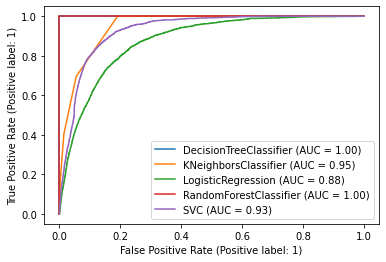

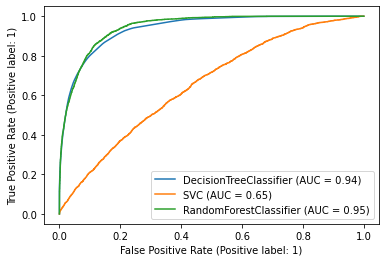

In [75]:
#Plotting AUC curves:
disp = plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(knn,x_train,y_train, ax=disp.ax_)
plot_roc_curve(lg,x_train,y_train, ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train, ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train, ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show
disp1 = plot_roc_curve(dt1,x_train,y_train)
plot_roc_curve(svc1,x_train,y_train, ax=disp1.ax_)
plot_roc_curve(rf1,x_train,y_train, ax=disp1.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

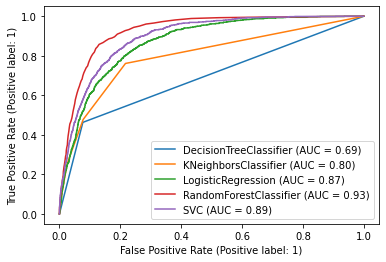

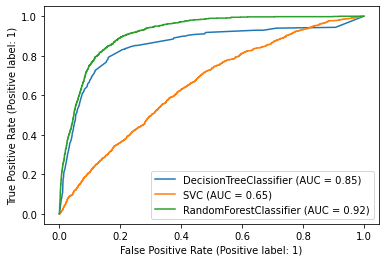

In [77]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)
plot_roc_curve(lg,x_test,y_test, ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

disp1 = plot_roc_curve(dt1,x_test,y_test)
plot_roc_curve(svc1,x_test,y_test, ax=disp1.ax_)
plot_roc_curve(rf1,x_test,y_test, ax=disp1.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

In [78]:
# Since AUC for random forest is the most we choose randonforest classifier to be the best

In [79]:
# Saving Model
import pickle
filename= 'TermDeposit.pkl'
pickle.dump(rf,open(filename, 'wb'))

In [80]:
#Conclusion
prediction=np.array (rf.predict(test_data))
df = pd.DataFrame({ "Predicted":prediction})
df

,Predicted
0,1
1,0
2,1
3,0
4,0
...,...
13559,0
13560,1
13561,1
13562,0
